Primeras 5 filas de tesla_data:
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  

Últimas 5 filas de tesla_revenue:
          Date Revenue
49  2010-06-30      28
50  2010-03-31      21
51  2009-12-31        
52  2009-09-30      46
53  2009-06-30      27


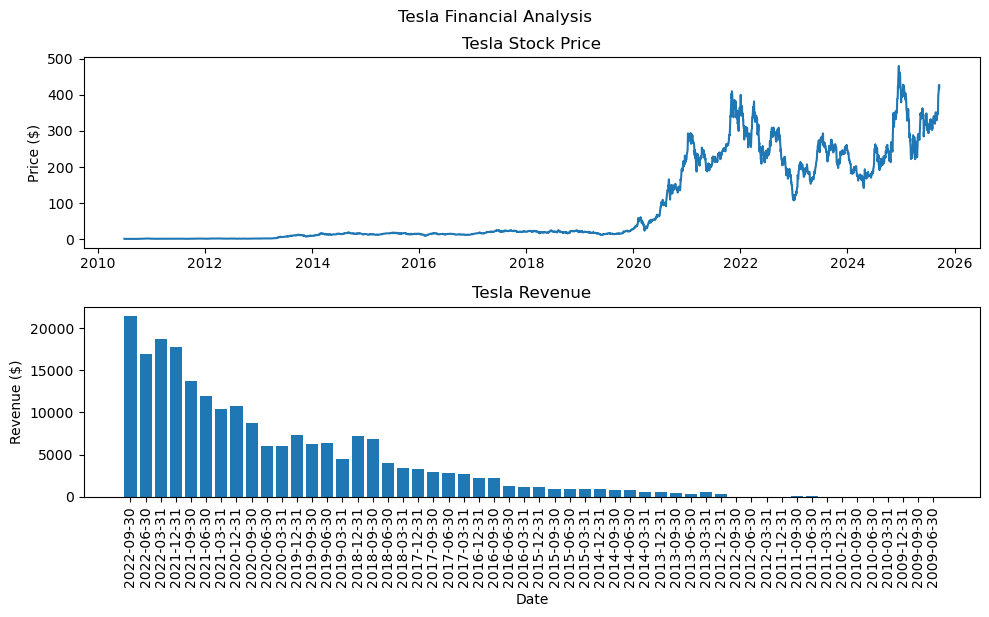

In [14]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Restablecemos el índice para que la fecha sea una columna
tesla_data = tesla_data.reset_index()


# Mostramos las primeras 5 filas
print("Primeras 5 filas de tesla_data:")
print(tesla_data.head())


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Parseamos el HTML
soup = BeautifulSoup(html_data, 'html.parser')

# Buscamos la tabla de ingresos de Tesla
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Encontramos la tabla correcta
for table in soup.find_all('table'):
     if 'Tesla Quarterly Revenue' in table.text:
        for row in table.find_all('tr'):
            cols = row.find_all('td')
            if len(cols) == 2:
                date = cols[0].text
                revenue = cols[1].text.replace('$', '').replace(',', '')
                
                # Añadimos los datos al DataFrame
                tesla_revenue = tesla_revenue._append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Mostramos las últimas 5 filas
print("\nÚltimas 5 filas de tesla_revenue:")
print(tesla_revenue.tail())


def make_graph(stock_data, revenue_data, stock):
    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
    
    # Gráfico de precio de acciones
    ax1.plot(stock_data['Date'], stock_data['Close'])
    ax1.set_title(f'{stock} Stock Price')
    ax1.set_ylabel('Price ($)')
    
    # Gráfico de ingresos
    revenue_data['Revenue'] = pd.to_numeric(revenue_data['Revenue'], errors='coerce')
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'])
    ax2.set_title(f'{stock} Revenue')
    ax2.set_ylabel('Revenue ($)')
    ax2.set_xlabel('Date')
    plt.xticks(rotation=90)
    
    # Ajustar diseño y mostrar
    plt.tight_layout()
    plt.suptitle(f'{stock} Financial Analysis', y=1.02)
    plt.show()

# Llamar a la función con los datos de Tesla
make_graph(tesla_data, tesla_revenue, 'Tesla')


Pregunta 3: Primeras 5 filas de gme_data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  

Pregunta 4: Últimas 5 filas de gme_revenue:
          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


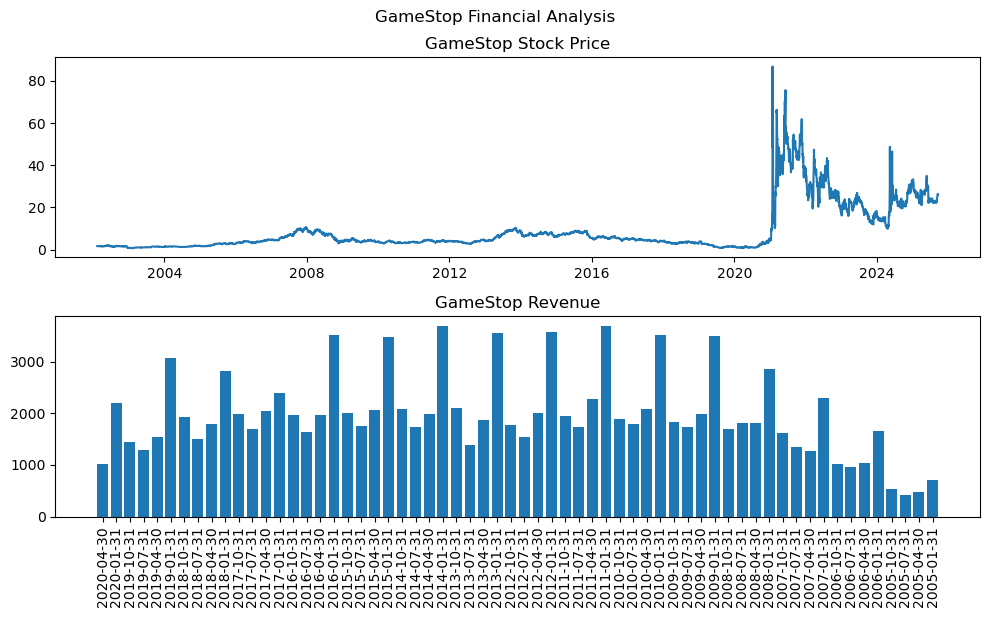

In [15]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


gme = yf.Ticker("GME")
gme_data = gme.history(period="max")


gme_data = gme_data.reset_index()

# Mostramos las primeras 5 filas
print("Pregunta 3: Primeras 5 filas de gme_data:")
print(gme_data.head())

# Pregunta 4: Web Scraping para extraer datos de ingresos de GameStop
# URL proporcionada para los datos de ingresos
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

# Parseamos el HTML
soup = BeautifulSoup(html_data, 'html.parser')

# Buscamos la tabla de ingresos de GameStop
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Encontramos la tabla correcta
for table in soup.find_all('table'):
    # Buscamos la tabla que contiene los datos de ingresos de GameStop
    if 'GameStop Quarterly Revenue' in table.text:
        for row in table.find_all('tr'):
            cols = row.find_all('td')
            if len(cols) == 2:
                date = cols[0].text
                revenue = cols[1].text.replace('$', '').replace(',', '')
                
                # Añadimos los datos al DataFrame
                gme_revenue = gme_revenue._append({"Date": date, "Revenue": revenue}, ignore_index=True)
        

# Convertimos la columna Revenue a valores numéricos
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

# Mostramos las últimas 5 filas
print("\nPregunta 4: Últimas 5 filas de gme_revenue:")
print(gme_revenue.tail())

def make_graph(stock_data, revenue_data, stock):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
    
    # Gráfico de precio de acciones
    ax1.plot(stock_data['Date'], stock_data['Close'])
    ax1.set_title(f'{stock} Stock Price')
    
    # Gráfico de ingresos
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'])
    ax2.set_title(f'{stock} Revenue')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.suptitle(f'{stock} Financial Analysis', y=1.02)
    plt.show()

# Crear el gráfico para GameStop
make_graph(gme_data, gme_revenue, 'GameStop')